Anupriya(301251645) - Assignment1( Dimensionality Reduction using PCA)

In [3]:
!pip install scikit-learn


In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import numpy as np

In [5]:
#Load the dataset MNIST
mnist = fetch_openml('mnist_784',version=1, as_frame=False)
x = mnist["data"]
y = mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


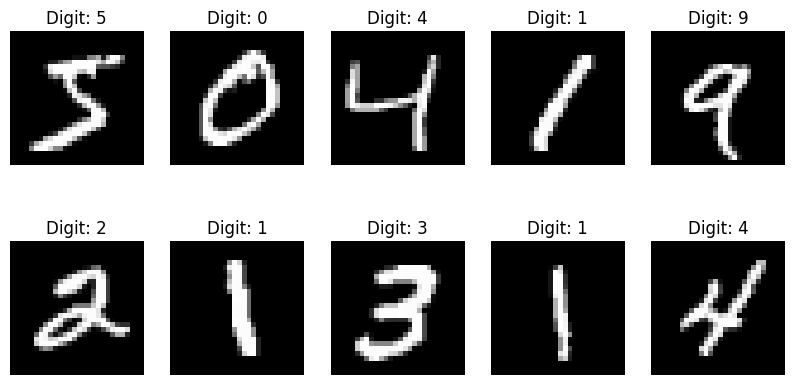

In [9]:
# Display each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')
plt.show()

In [10]:
# Use PCA to retrieve the 1st and 2nd principal component
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")



Explained variance ratio: [0.09746116 0.07155445]


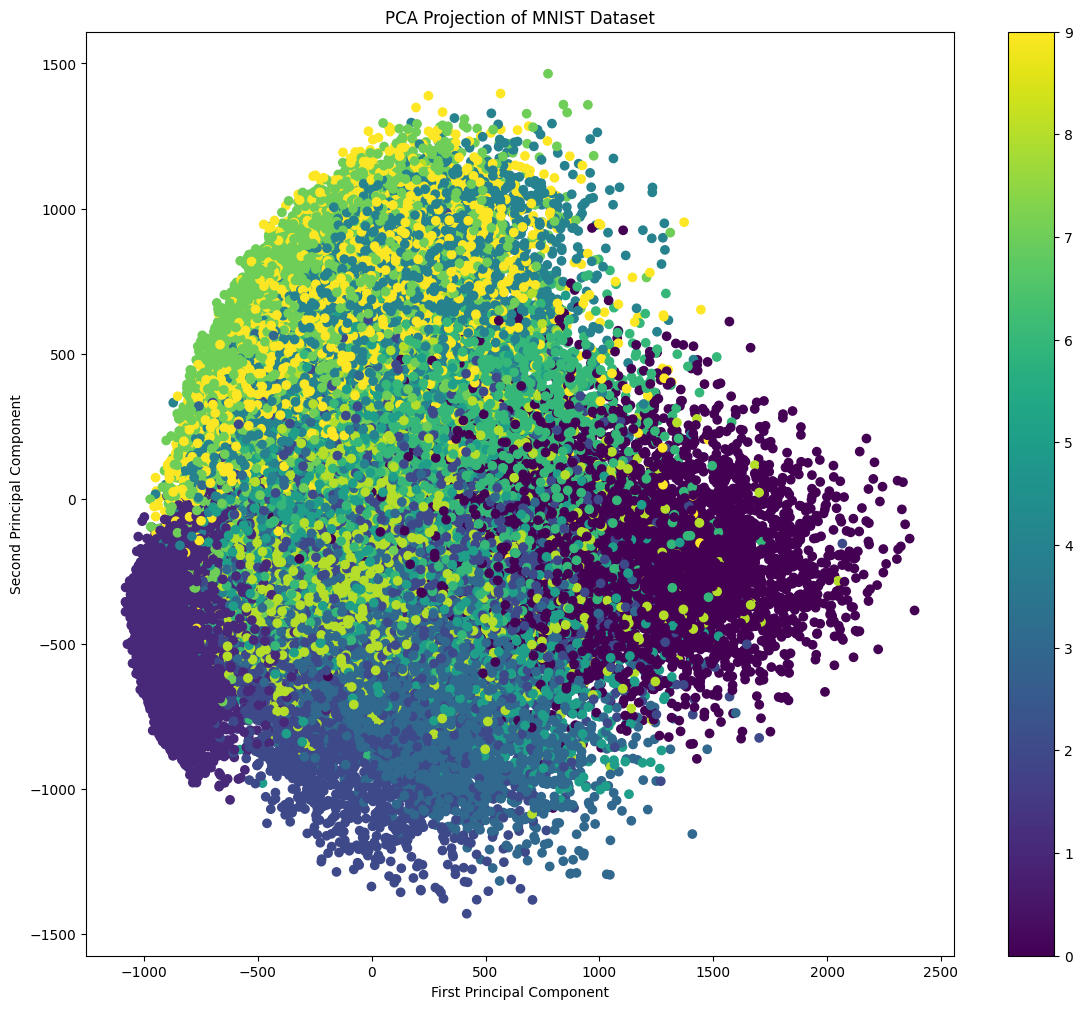

In [11]:
# Plot the projections of the 1st and 2nd principal component
plt.figure(figsize=(14, 12))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y.astype(int), cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Projection of MNIST Dataset")
plt.colorbar()
plt.show()


In [12]:
# Use Incremental PCA to reduce the dimensionality to 154 dimensions
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(x, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(x)

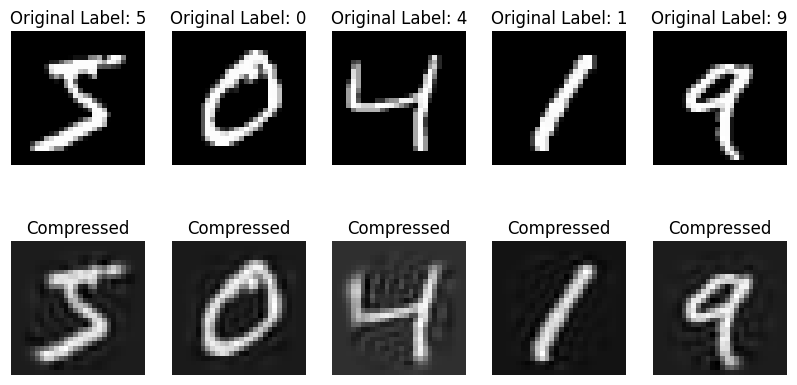

In [13]:
def display_compressed_digits(data_original, data_reduced, labels, n):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        # Reconstruct from compressed version
        digit_compressed = inc_pca.inverse_transform(data_reduced[i])

        plt.subplot(2, n, i + 1)
        plt.imshow(data_original[i].reshape(28, 28), cmap='gray')
        plt.title(f"Original Label: {labels[i]}")
        plt.axis('off')

        plt.subplot(2, n, i + 1 + n)
        plt.imshow(digit_compressed.reshape(28, 28), cmap='gray')
        plt.title(f"Compressed")
        plt.axis('off')

    plt.show()

display_compressed_digits(x, X_reduced, y, 5)


In [14]:
# Generating Swiss Roll Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_swiss_roll(n_samples=1000, noise=0.1):
    t = np.random.rand(n_samples) * 2 * np.pi
    x = t * np.cos(t)
    y = t * np.sin(t)
    z = np.random.normal(0, noise, n_samples)
    X = np.array([x, y, z]).T
    return X

X = generate_swiss_roll(n_samples=1000, noise=0.1)

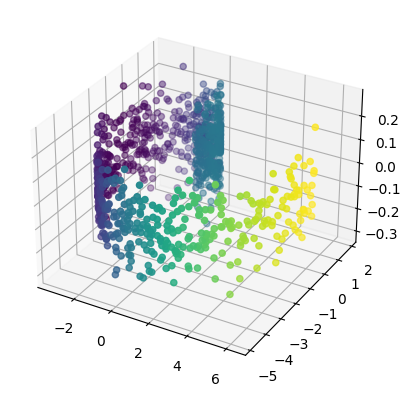

In [ ]:
#Plotting Swiss Roll Dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0])
plt.show()

In [15]:
#Applying Kernal PCA
from sklearn.decomposition import KernelPCA

kpca_linear = KernelPCA(n_components=2, kernel='linear')
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid')

X_linear = kpca_linear.fit_transform(X)
X_rbf = kpca_rbf.fit_transform(X)
X_sigmoid = kpca_sigmoid.fit_transform(X)

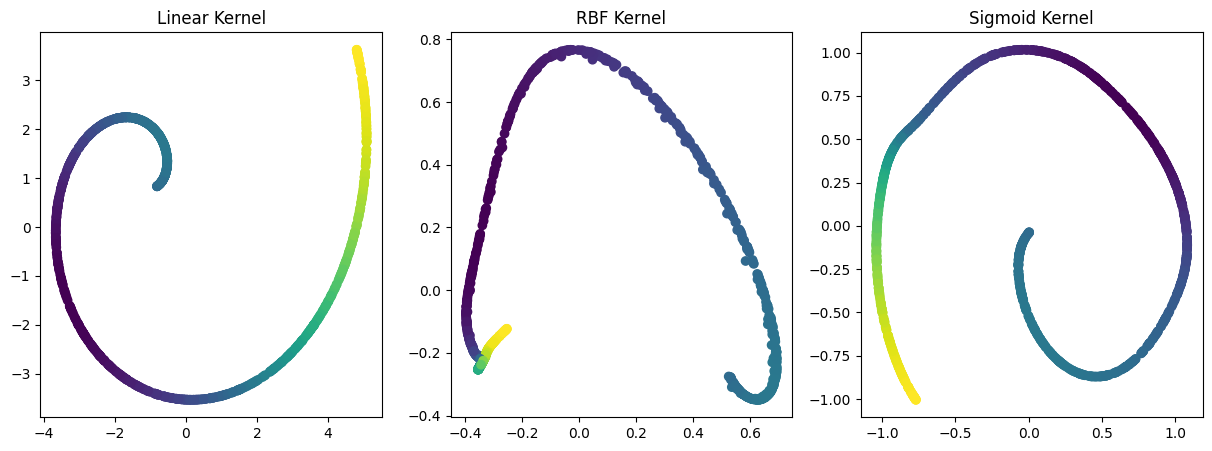

In [16]:
#Plotting KPCA Results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(X_linear[:, 0], X_linear[:, 1], c=X[:, 0])
axes[0].set_title("Linear Kernel")

axes[1].scatter(X_rbf[:, 0], X_rbf[:, 1], c=X[:, 0])
axes[1].set_title("RBF Kernel")

axes[2].scatter(X_sigmoid[:, 0], X_sigmoid[:, 1], c=X[:, 0])
axes[2].set_title("Sigmoid Kernel")

plt.show()

In [18]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'kpca__kernel': ['linear', 'rbf', 'sigmoid'], 'kpca__gamma': [0.1, 1, 10]}
scoring = make_scorer(accuracy_score)
grid_search = GridSearchCV(Pipeline([('kpca', KernelPCA(n_components=2)), ('log_reg', LogisticRegression())]),
                           param_grid, cv=5, scoring=scoring)
grid_search.fit(X, np.random.binomial(1, 0.5, X.shape[0]))

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'kpca__gamma': 10, 'kpca__kernel': 'rbf'}
Best accuracy: 0.5090000000000001


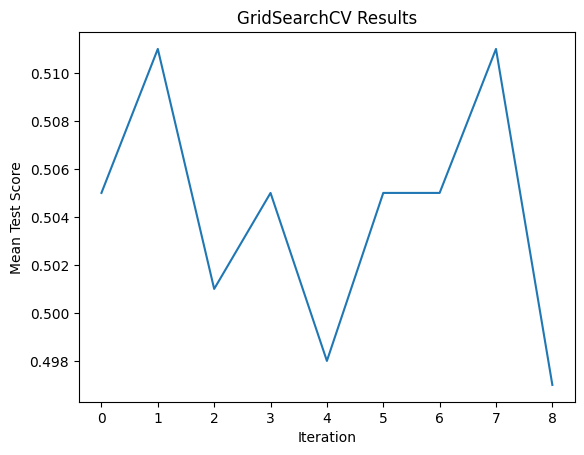

In [ ]:
import matplotlib.pyplot as plt

plt.plot(grid_search.cv_results_['mean_test_score'])
plt.xlabel("Iteration")
plt.ylabel("Mean Test Score")
plt.title("GridSearchCV Results")
plt.show()